In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import networkx as nx
%matplotlib inline

C:\Users\skhim\AppData\Local\Temp\ipykernel_25108\3144374601.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('keystroke_data.csv')
df.head()

,name,rep,H.period,H.t,DD.period.t,UD.period.t,H.i,DD.t.i,UD.t.i,H.e,...,DD.o.n,UD.o.n,H.a,DD.n.a,UD.n.a,H.l,DD.a.l,UD.a.l,backspaces,caps_lock
0,not_smriti,1,0.092790,0.090883,0.246703,0.337586,0.087738,0.153798,0.241535,0.087737,...,0.056452,0.229154,0.154004,0.218646,0.372650,0.096280,0.171825,0.268105,0,0
1,not_smriti,2,0.087310,0.085243,0.304038,0.389281,0.097292,0.217083,0.314374,0.102547,...,0.061247,0.225106,0.101477,0.194049,0.295526,0.101519,0.224497,0.326015,0,0
2,not_smriti,3,0.130960,0.086942,0.329384,0.416326,0.093535,0.090715,0.184250,0.086722,...,0.144304,0.252867,0.176790,0.134659,0.311448,0.098133,0.156365,0.254498,0,0
3,not_smriti,4,0.140503,0.074106,0.361985,0.436090,0.094165,1.971756,2.065921,0.109514,...,0.126976,0.255856,0.124415,0.244116,0.368531,0.084438,0.282270,0.366708,0,0
4,not_smriti,5,0.147327,0.077649,0.291591,0.369241,0.109658,0.166732,0.276390,0.119945,...,0.096402,0.246673,0.154400,0.194311,0.348711,0.131821,0.163093,0.294914,0,0


In [3]:
subjects = df['name'].unique()

In [4]:
subjects_to_int = {subject: i  for i, subject in enumerate(subjects)}
int_to_subjects = {i: subject for i, subject in enumerate(subjects)}

In [5]:
df = df.replace(subjects_to_int)

C:\Users\skhim\AppData\Local\Temp\ipykernel_25108\1725018810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(subjects_to_int)


In [6]:
df.head()

,name,rep,H.period,H.t,DD.period.t,UD.period.t,H.i,DD.t.i,UD.t.i,H.e,...,DD.o.n,UD.o.n,H.a,DD.n.a,UD.n.a,H.l,DD.a.l,UD.a.l,backspaces,caps_lock
0,0,1,0.092790,0.090883,0.246703,0.337586,0.087738,0.153798,0.241535,0.087737,...,0.056452,0.229154,0.154004,0.218646,0.372650,0.096280,0.171825,0.268105,0,0
1,0,2,0.087310,0.085243,0.304038,0.389281,0.097292,0.217083,0.314374,0.102547,...,0.061247,0.225106,0.101477,0.194049,0.295526,0.101519,0.224497,0.326015,0,0
2,0,3,0.130960,0.086942,0.329384,0.416326,0.093535,0.090715,0.184250,0.086722,...,0.144304,0.252867,0.176790,0.134659,0.311448,0.098133,0.156365,0.254498,0,0
3,0,4,0.140503,0.074106,0.361985,0.436090,0.094165,1.971756,2.065921,0.109514,...,0.126976,0.255856,0.124415,0.244116,0.368531,0.084438,0.282270,0.366708,0,0
4,0,5,0.147327,0.077649,0.291591,0.369241,0.109658,0.166732,0.276390,0.119945,...,0.096402,0.246673,0.154400,0.194311,0.348711,0.131821,0.163093,0.294914,0,0


In [7]:
data_raw = df.values
print(data_raw)
data_raw.shape

[[ 0.          1.          0.09279013 ...  0.26810479  0.
   0.        ]
 [ 0.          2.          0.08730984 ...  0.32601547  0.
   0.        ]
 [ 0.          3.          0.13095999 ...  0.25449801  0.
   0.        ]
 ...
 [ 0.          8.          0.07643366 ...  0.31427527  0.
   2.        ]
 [ 0.          9.          0.0811522  ...  0.28283095  0.
   2.        ]
 [ 0.         10.          0.06935549 ...  0.28545785  0.
   2.        ]]


(150, 32)

In [9]:
data=data_raw[ :, 2:]
labels_raw = df['name'].values
labels= labels_raw.reshape(labels_raw.shape[0],1)
data=np.hstack([data, labels])
print(data)

[[0.09279013 0.09088349 0.24670267 ... 0.         0.         0.        ]
 [0.08730984 0.08524323 0.30403805 ... 0.         0.         0.        ]
 [0.13095999 0.08694196 0.32938385 ... 0.         0.         0.        ]
 ...
 [0.07643366 0.06415033 0.25652361 ... 0.         2.         0.        ]
 [0.0811522  0.04557419 0.29244423 ... 0.         2.         0.        ]
 [0.06935549 0.07601428 0.26608658 ... 0.         2.         0.        ]]


In [10]:
np.random.shuffle(data)
x=data[ : , :-1]
y=data[:,-1]
x.shape

(150, 30)

In [ ]:
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [14]:
Y_train = to_categorical(y_train, num_classes=2)
Y_test=to_categorical(y_test,num_classes=2)


In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(135, 30, 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# rnn = Sequential()
# rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# rnn.add(Dropout(0.2))
# for i in [True, True, False]:
#     rnn.add(LSTM(units = 45, return_sequences = i))
#     rnn.add(Dropout(0.2))
# rnn.add(Dense(units = 51, activation='softmax', name='output_layer'))

In [17]:
rnn = Sequential()
for i in [True, True, False]:
    rnn.add(LSTM(units = 45, return_sequences = i))
    rnn.add(Dropout(0.2))
rnn.add(Dense(units = 2))

In [18]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.1)
opt = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999)

In [19]:
rnn.compile(optimizer = opt, loss = 'categorical_crossentropy')

Epoch 1/60
5/5 [==============================] - 6s 228ms/step - loss: 2.2204 - val_loss: 0.5341
Epoch 2/60
5/5 [==============================] - 0s 36ms/step - loss: 0.3821 - val_loss: 0.4048
Epoch 3/60
5/5 [==============================] - 0s 30ms/step - loss: 0.3279 - val_loss: 0.2796
Epoch 4/60
5/5 [==============================] - 0s 32ms/step - loss: 0.5934 - val_loss: 0.2773
Epoch 5/60
5/5 [==============================] - 0s 29ms/step - loss: 0.6177 - val_loss: 0.2768
Epoch 6/60
5/5 [==============================] - 0s 36ms/step - loss: 3.1101 - val_loss: 0.2773
Epoch 7/60
5/5 [==============================] - 0s 30ms/step - loss: 2.5170 - val_loss: 0.2792
Epoch 8/60
5/5 [==============================] - 0s 32ms/step - loss: 3.7156 - val_loss: 2.4384
Epoch 9/60
5/5 [==============================] - 0s 33ms/step - loss: 3.7089 - val_loss: 3.5062
Epoch 10/60
5/5 [==============================] - 0s 40ms/step - loss: 2.9955 - val_loss: 3.5010
Epoch 11/60
5/5 [===========

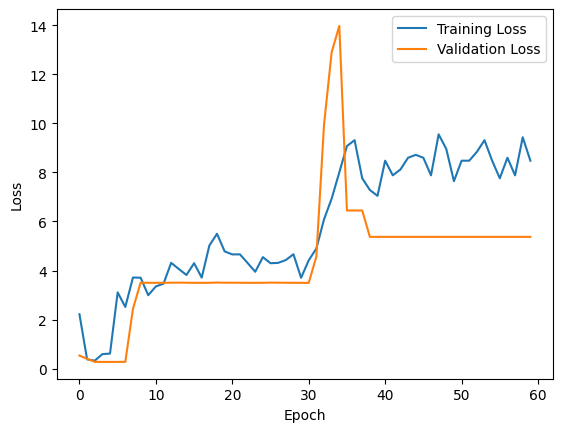

In [20]:
history= rnn.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs = 60, batch_size=32)

# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# rnn.save_weights('rnn_weights.h5')

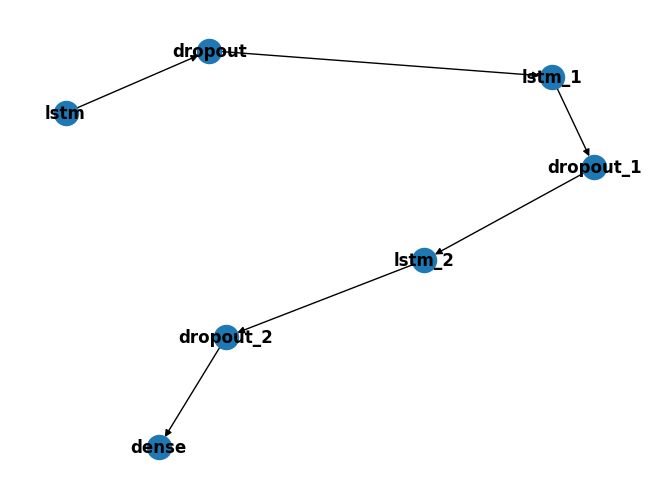

In [21]:
G = nx.DiGraph()  # Create a directed graph

for layer in rnn.layers:
    G.add_node(layer.name)

# Add edges (connections)
for i in range(len(rnn.layers) - 1):
    G.add_edge(rnn.layers[i].name, rnn.layers[i + 1].name)

# Customize layout and display
pos = nx.spring_layout(G)  # Choose a layout algorithm
nx.draw(G, pos, with_labels=True, font_weight="bold")
plt.show()


In [22]:
print(X_test.shape)
predictions_prob= rnn.predict(X_test)
y_pred=[np.argmax(i) for i in predictions_prob]
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

(15, 30, 1)
1/1 [==============================] - 1s 916ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
0.6


In [ ]:
# rnn.save('LSTM.keras') 